In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage.io import imsave

from os import listdir
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory('../data/image/train/', target_size=(499, 161), color_mode='grayscale', class_mode='binary')

Found 8558 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory('../data/image/test', target_size=(499, 161), color_mode='grayscale', class_mode='binary')

Found 962 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(filters = 5, kernel_size = (3, 3), activation = 'relu', input_shape = (161, 499, 1)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [8]:
earlystop = EarlyStopping(patience=5)

In [9]:
history = model.fit(
    train_generator, 
    validation_data=test_generator, 
    callbacks=[earlystop], 
    epochs=25
)

Epoch 1/25
268/268 [==============================] - 578s 2s/step - loss: 1.7949 - acc: 0.6263 - val_loss: 1.2364 - val_acc: 0.6341
Epoch 2/25
268/268 [==============================] - 655s 2s/step - loss: 0.5778 - acc: 0.7252 - val_loss: 0.6398 - val_acc: 0.6486
Epoch 3/25
268/268 [==============================] - 720s 3s/step - loss: 0.5353 - acc: 0.7504 - val_loss: 0.6314 - val_acc: 0.6881
Epoch 4/25
 73/268 [=======>......................] - ETA: 6:51 - loss: 0.5160 - acc: 0.7529

KeyboardInterrupt: 

Text(0.5, 1.0, 'Results')

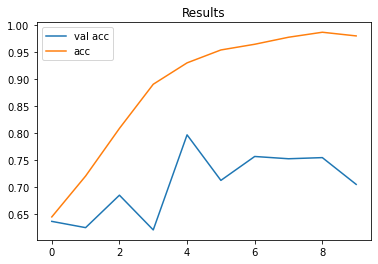

In [102]:
# plot
plt.plot(history.history['val_acc'], label = 'val acc')
plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.title('Results')